In [4]:
import pandas as pd

In [5]:
fname="Jelgava_2017-2021_t_p_def.xls"
df=pd.read_excel(fname,parse_dates=["Datums \ Laiks"],index_col=0)
df=df.reindex(columns=["vidējais sniega segas biezums, cm","summa","dienas vidējā temperatūra, C","vidējais relatīvais mitrums"])
df

,"vidējais sniega segas biezums, cm",summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums
Datums \ Laiks,,,,
2017-01-01,0.000000,0.2,6.016667,94.000000
2017-01-02,0.166667,0.8,0.800000,95.500000
2017-01-03,0.291667,0.0,-2.641667,89.583333
2017-01-04,6.750000,4.0,-4.291667,88.958333
2017-01-05,7.375000,0.2,-13.229167,68.000000
...,...,...,...,...
2021-12-27,10.000000,0.0,-3.950000,89.083333
2021-12-28,9.125000,0.0,-8.379167,90.000000
2021-12-29,9.000000,0.0,-7.241667,72.000000


In [6]:
window_size=12
for i in range(1, window_size):
    df[f'summa_{i}'] = df['summa'].shift(i)
    df[f'dvt_{i}'] = df['dienas vidējā temperatūra, C'].shift(i)
    df[f'vrm_{i}'] = df['vidējais relatīvais mitrums'].shift(i)
    
df=df.dropna()


In [12]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
from sklearn.model_selection import train_test_split

In [1]:
from keras.models import Sequential
from keras.layers import Dense


In [16]:
# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 19.6990 - accuracy: 0.4473
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 4.8170 - accuracy: 0.5348
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 4.1320 - accuracy: 0.5286
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 3.4184 - accuracy: 0.5520
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 3.0894 - accuracy: 0.5700
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 2.9309 - accuracy: 0.5865
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 2.5686 - accuracy: 0.6079
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 2.3665 - accuracy: 0.6409
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 2.6338 - accuracy: 0.6044
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 2.2747 - accuracy: 0.6589
Epoch 11

46/46 [==============================] - 0s 3ms/step - loss: 1.0429 - accuracy: 0.7581
Epoch 84/100
46/46 [==============================] - 0s 4ms/step - loss: 1.0976 - accuracy: 0.7857
Epoch 85/100
46/46 [==============================] - 0s 3ms/step - loss: 1.1667 - accuracy: 0.7574
Epoch 86/100
46/46 [==============================] - 0s 3ms/step - loss: 1.0718 - accuracy: 0.7484
Epoch 87/100
46/46 [==============================] - 0s 4ms/step - loss: 1.0807 - accuracy: 0.7684
Epoch 88/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1974 - accuracy: 0.7133
Epoch 89/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1056 - accuracy: 0.7553
Epoch 90/100
46/46 [==============================] - 0s 3ms/step - loss: 1.0723 - accuracy: 0.7726
Epoch 91/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1301 - accuracy: 0.7436
Epoch 92/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1263 - accuracy: 0.7264
Epoch 93/100


In [19]:
test_loss = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 2.0392 - accuracy: 0.6777


In [20]:
import matplotlib.pyplot as plt

In [21]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 3ms/step


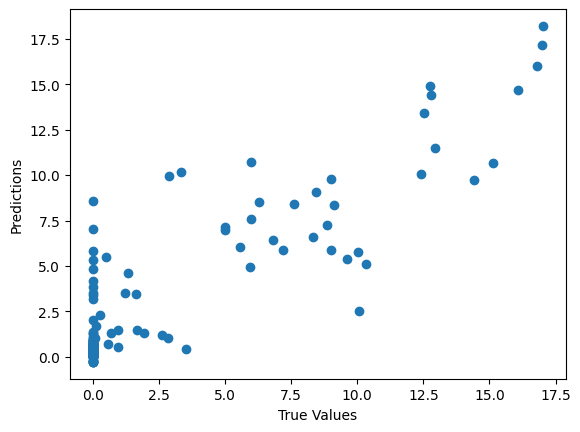

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [24]:
y_pred = model.predict(X)

57/57 [==============================] - 0s 3ms/step


In [25]:
df["snowcover_predicted"]=y_pred

C:\Users\didzis\AppData\Local\Temp\ipykernel_1608\4223927865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["snowcover_predicted"]=y_pred


C:\Users\didzis\AppData\Local\Temp\ipykernel_1608\4291089447.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017"])


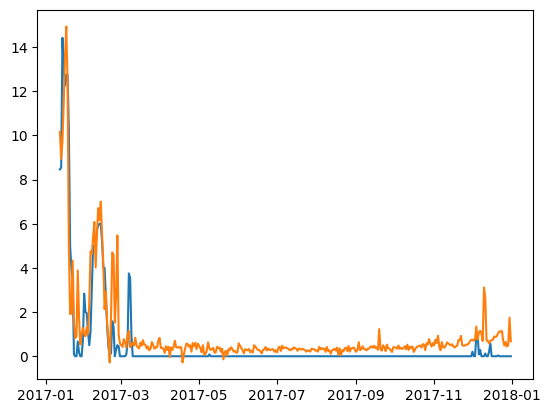

In [27]:
plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017"])